In [1]:
import pytesseract
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np

#For Configuration

In [2]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [3]:
img = cv2.imread('demo.png')

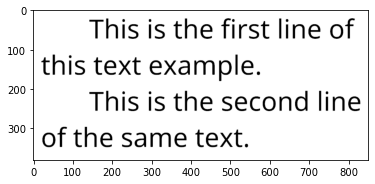

In [4]:
plt.imshow(img)

In [5]:
img2char = pytesseract.image_to_string(img)

In [6]:
print(img2char)

This is the first line of
this text example.

This is the second line
of the same text.



In [7]:
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

cap = cv2.VideoCapture(0)

    
cntr = 0;
while True:
    ret, frame = cap.read()
    cntr = cntr+1;
    if ((cntr%20) == 0):
        imgH, imgW,_ = frame.shape
        x1,y1,w1,h1 = 0,0,imgH, imgW
        
        imgChar = pytesseract.image_to_string(frame)
        
        imgboxes = pytesseract.image_to_boxes(frame)
        
        for boxes in imgboxes.splitlines():
            boxes = boxes.split(' ')
            x,y,w,h = int(boxes[1]), int(boxes[2]), int(boxes[3]), int(boxes[4])
            cv2.rectangle(frame, (x, imgH-y), (w, imgH-h), (0,0,255), 3)
            
            cv2.putText(frame, imgChar, (x1 + int(w1/50), y1 + int(h1/50)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,0,0), 2)
            
            font = cv2.FONT_HERSHEY_SIMPLEX
            
            
            
            cv2.imshow('Text Detection is DONE!!', frame)
            
            if cv2.waitKey(2) & 0xFF == ord('q'):
                break

cap.release()
cv2.distroryAllWindows()

KeyboardInterrupt: 